<a href="https://colab.research.google.com/github/julianovale/lean_6_sigma_python/blob/master/0006_teste_hipotese_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de variância (ANOVA)
- Um gerente suspeita que a desempenho de 3 equipes com diferentes turnos (manhã, tarde, noite) variam. Suspeita que o turno impacte o desempenho da equipe. Dados foram coletados.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon

In [ ]:
AN = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/anova.xlsx?raw=true")

In [ ]:
AN

,Day,Noon,Night
0,9.236348,9.090199,8.901892
1,9.252986,8.950993,9.100092
2,9.248021,8.895417,8.841298
3,9.406213,8.844150,8.991732
4,9.252373,9.026661,8.802963
5,9.475237,8.944478,8.917330
6,9.309529,9.104782,8.828534
7,9.338340,8.947740,8.811452
8,9.364601,8.934479,8.987952
9,9.304998,8.992930,8.961595


## Preparando o DataFrame

In [ ]:
ANS=AN.stack().rename_axis(('Series','Timing')).reset_index(name="Val")
ANS

,Series,Timing,Val
0,0,Day,9.236348
1,0,Noon,9.090199
2,0,Night,8.901892
3,1,Day,9.252986
4,1,Noon,8.950993
5,1,Night,9.100092
6,2,Day,9.248021
7,2,Noon,8.895417
8,2,Night,8.841298
9,3,Day,9.406213


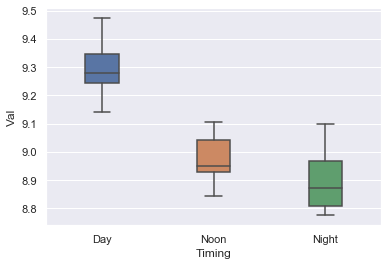

In [ ]:
sns.boxplot(x=ANS.Timing, y=ANS.Val, width = 0.3)

In [ ]:
stats.normaltest(ANS.Val).pvalue # se valor-p > 0.05 aceito H0: a amostra é normal

0.09589191834455094

### Importações necessárias

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
y=ANS.Val
x=ANS.Timing
formula='y ~ x'
model = ols(formula, ANS).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
x,2.0,1.087088,0.543544,63.627012,4.743867e-12
Residual,33.0,0.281908,0.008543,NaN,NaN


### Como analisar?
- O "PR(>F)" da tabela acima é o valor-p. H0: as amostras apresentam a mesma variância; Ha: pelo menos uma das amostras apresenta variância diferente das demais. Alfa = 0.05.
- No caso, como o valor-p é muito menor que 0.05 (4,74 * 10^-12), H0 não deve ser aceita, então pelo menos uma das amostras difere em variância.